#**Importing Libraries**

In [0]:
import tweepy
import re
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [0]:
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from tweepy import OAuthHandler

#**Changing Working Directory**

In [0]:
import os

In [0]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Twitter Sentiment Analysis')

#**Authentication Details**

In [0]:
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'


In [0]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,timeout=15)


In [0]:
places = api.geo_search(query="INDIA", granularity="country")

In [0]:
place_id = places[0].id
print('india id is: ',place_id)

india id is:  b850c1bfd38f30e0


In [0]:
places

[Place(_api=<tweepy.api.API object at 0x7fbc5b61a400>, id='b850c1bfd38f30e0', url='https://api.twitter.com/1.1/geo/id/b850c1bfd38f30e0.json', place_type='country', name='India', full_name='India', country_code='IN', country='India', contained_within=[], centroid=[79.91569416233017, 20.568453], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x7fbc5b61a400>, type='Polygon', coordinates=[[[67.997691, 6.622513], [67.997691, 33.254896], [97.170672, 33.254896], [97.170672, 6.622513], [67.997691, 6.622513]]]), attributes={}),
 Place(_api=<tweepy.api.API object at 0x7fbc5b61a400>, id='88f6c97979c5c22d', url='https://api.twitter.com/1.1/geo/id/88f6c97979c5c22d.json', place_type='country', name='British Indian Ocean Territory', full_name='British Indian Ocean Territory', country_code='IO', country='British Indian Ocean Territory', contained_within=[], centroid=[71.3834071192206, -6.684143000000001], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x7fbc5b61a400>, type='Polygon',

#**Collecting Tweets from Twitter**

In [0]:
args = ['trump visit delhi']
delhi_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="28.61309,77.209211,500km",truncated=False).items():

         delhi_tweets[status.created_at]=status.full_text    

In [0]:
delhi_tweets=pd.DataFrame(delhi_tweets.items(),columns=['Time_stamp','Text'])

In [0]:
delhi_tweets_copy=delhi_tweets.copy()
delhi_tweets.tail()

,Time_stamp,Text
911,2020-02-17 12:49:22,"Cost of Trump's ""3 hour"" visit in Ahmedabad eq..."
912,2020-02-17 06:53:49,Garibi Chhupao : Sena mocks BJP for constructi...
913,2020-02-17 06:06:43,"""Namaste Trump"" : India embraces national flav..."
914,2020-02-16 19:21:49,"New Delhi,17 February, 2020\nHearty welcome to..."
915,2020-02-16 16:09:43,Building walls to hide slums in Gujarat for Tr...


In [0]:
delhi_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
Time_stamp    916 non-null datetime64[ns]
Text          916 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 14.4+ KB


In [0]:
delhi_tweets['Text'][5]

"#DelhiViolence\n\nTheCitizen's timeline of the events so far: https://t.co/0CheSUSjVk\n#TCEditorial - Delhi is burning, evoking visions of 1984: https://t.co/OCWr2aqnr6 \nHow the international media has covered the violence in Delhi: https://t.co/As8V4wniDl https://t.co/PpfPT9EWRU"

In [0]:
args = ['trump agra']
agra_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="27.174754,78.042244,200km").items():

         agra_tweets[status.created_at]=status.full_text      

In [0]:
agra_tweets=pd.DataFrame(agra_tweets.items(),columns=['Time_stamp','Text'])
agra_tweets.head()
agra_tweets_copy=agra_tweets.copy()

In [0]:
agra_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 2 columns):
Time_stamp    646 non-null datetime64[ns]
Text          646 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 10.2+ KB


In [0]:
args = ['namaste trump']
ahem_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="23.056363,72.575153,500km").items():

         ahem_tweets[status.created_at]=status.full_text  

In [0]:
ahem_tweets=pd.DataFrame(ahem_tweets.items(),columns=['Time_stamp','Text'])
ahem_tweets_copy=ahem_tweets.copy()
ahem_tweets.head()

,Time_stamp,Text
0,2020-02-26 05:03:44,"*Namaste Trump*\nBloody-Game,\nGoing on \n#Ind..."
1,2020-02-26 05:01:54,Read - Shiv Sena in its mouthpiece Saamana has...
2,2020-02-26 04:34:51,Very good coverage of Namaste Trump program on...
3,2020-02-26 04:33:23,@WhiteHouse @realDonaldTrump Namaste Trump wel...
4,2020-02-26 04:24:47,EDIT |\n\nUS President Donald Trump’s visit to...


In [0]:
ahem_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 2 columns):
Time_stamp    1866 non-null datetime64[ns]
Text          1866 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 29.3+ KB


In [0]:
import pytz
from datetime import datetime
from pytz import timezone
tz_India = pytz.timezone('Asia/Kolkata')

In [0]:
str(datetime.now(tz_India))

'2020-02-26 10:35:29.992757+05:30'

#**Text Cleaning**

In [0]:
def clean_text(data,col):
  corpus=[]
  for i in range(len(data[col])):
    text=re.sub(r'http\S+', ' ', data[col][i])
    text=text.lower()
    text=re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)
    text=re.sub(r'[@#\$%&\*\(\)\<\>\?\!\;\'\\-\_"]',' ',text)
    text= re.sub(r'\W',' ',text)
    text=re.sub(r'\d',' ',text)
    text=re.sub(r'^[a-z]\s',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]$',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpus.append(text)
  return corpus

In [0]:
delhi_tweets['Text']=clean_text(delhi_tweets,'Text')

In [0]:
delhi_tweets.head()

,Time_stamp,Text
0,2020-02-26 04:47:18,delhiburning is orchestrated by the delhi pol...
1,2020-02-26 04:46:47,exclusive irked with donald trump india visit ...
2,2020-02-26 04:32:31,it is my first visit to india and cannot expre...
3,2020-02-26 04:28:14,this is state sponsored terrorism my report f...
4,2020-02-26 04:27:09,the trump visit is over can everyone please tu...


In [0]:
delhi_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
Time_stamp    916 non-null datetime64[ns]
Text          916 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 14.4+ KB


In [0]:
agra_tweets['Text']=clean_text(agra_tweets,'Text')

In [0]:
agra_tweets.tail()

,Time_stamp,Text
641,2020-02-17 10:21:35,agra preparations underway in the city ahead o...
642,2020-02-17 06:38:36,yogi adityanath to visit agra to check prepara...
643,2020-02-17 05:50:00,before donald trump visit yogi to scout out agra
644,2020-02-17 05:43:28,yogi adityanath to review arrangements for tru...
645,2020-02-17 04:16:24,uttarpradesh chief minister yogiadityanath wi...


In [0]:
agra_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 2 columns):
Time_stamp    646 non-null datetime64[ns]
Text          646 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 10.2+ KB


In [0]:
ahem_tweets['Text']=clean_text(ahem_tweets,'Text')

In [0]:
ahem_tweets.head()

,Time_stamp,Text
0,2020-02-26 05:03:44,namaste trump bloody game going on india but ...
1,2020-02-26 05:01:54,read shiv sena in its mouthpiece saamana has s...
2,2020-02-26 04:34:51,very good coverage of namaste trump program on...
3,2020-02-26 04:33:23,whitehouse realdonaldtrump namaste trump welc...
4,2020-02-26 04:24:47,edit us president donald trump visit to india ...


In [0]:
ahem_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 2 columns):
Time_stamp    1866 non-null datetime64[ns]
Text          1866 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 29.3+ KB


#**Extracting Day and hour of tweet from Time_stamp**

In [0]:
delhi_tweets['Hour']=pd.to_datetime(delhi_tweets.Time_stamp).dt.hour
agra_tweets['Hour']=pd.to_datetime(agra_tweets.Time_stamp).dt.hour
ahem_tweets['Hour']=pd.to_datetime(ahem_tweets.Time_stamp).dt.hour


In [0]:
delhi_tweets['Day']=pd.to_datetime(delhi_tweets.Time_stamp).dt.day
agra_tweets['Day']=pd.to_datetime(agra_tweets.Time_stamp).dt.day
ahem_tweets['Day']=pd.to_datetime(ahem_tweets.Time_stamp).dt.day


In [0]:
delhi_tweets.tail()

,Time_stamp,Text,Hour,Day
911,2020-02-17 12:49:22,cost trump hour visit ahmedabad equals cost fr...,12,17
912,2020-02-17 06:53:49,garibi chhupao sena mocks bjp constructing wal...,6,17
913,2020-02-17 06:06:43,namaste trump india embraces national flavour ...,6,17
914,2020-02-16 19:21:49,new delhi february hearty welcome hon ble shri...,19,16
915,2020-02-16 16:09:43,building walls hide slums gujarat trump visit ...,16,16


In [0]:
delhi_tweets_copy.tail()

,Time_stamp,Text
911,2020-02-17 12:49:22,"Cost of Trump's ""3 hour"" visit in Ahmedabad eq..."
912,2020-02-17 06:53:49,Garibi Chhupao : Sena mocks BJP for constructi...
913,2020-02-17 06:06:43,"""Namaste Trump"" : India embraces national flav..."
914,2020-02-16 19:21:49,"New Delhi,17 February, 2020\nHearty welcome to..."
915,2020-02-16 16:09:43,Building walls to hide slums in Gujarat for Tr...


In [0]:
def remove_stopword(data,col):
  corpus=[]
  s=set(stopwords.words('english'))
  s1=['not','or','and','no','nor']
  for i in s1:
    if i in s:
      s.remove(i)
  for i in range(len(data[col])):
    words = nltk.word_tokenize(data[col][i])
    word1 = [word for word in words if word not in s]
    corpus.append(' '.join(word1))
  return corpus


In [0]:
delhi_tweets["Text"]=remove_stopword(delhi_tweets,'Text')

In [0]:
delhi_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-26 04:47:18,delhiburning orchestrated delhi police amp rss...,4,26
1,2020-02-26 04:46:47,exclusive irked donald trump india visit pakis...,4,26
2,2020-02-26 04:32:31,first visit india and not express delightful m...,4,26
3,2020-02-26 04:28:14,state sponsored terrorism report awful couple ...,4,26
4,2020-02-26 04:27:09,trump visit everyone please turn attention det...,4,26


In [0]:
agra_tweets["Text"]=remove_stopword(agra_tweets,'Text')

In [0]:
agra_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-25 15:17:51,trump got emotional,15,25
1,2020-02-25 14:55:09,president united states donald trump and first...,14,25
2,2020-02-25 12:57:48,guide trump said americans come agra,12,25
3,2020-02-25 12:48:26,lotus temple baháʼí house worship able make in...,12,25
4,2020-02-25 11:35:48,news pics trump daughter ivankatrump amp son l...,11,25


In [0]:
ahem_tweets['Text']=remove_stopword(ahem_tweets,'Text')
                              

In [0]:
ahem_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-26 05:03:44,namaste trump bloody game going india world sl...,5,26
1,2020-02-26 05:01:54,read shiv sena mouthpiece saamana said riots c...,5,26
2,2020-02-26 04:34:51,good coverage namaste trump program ddnational...,4,26
3,2020-02-26 04:33:23,whitehouse realdonaldtrump namaste trump welcome,4,26
4,2020-02-26 04:24:47,edit us president donald trump visit india exp...,4,26


#**TFIDF Model**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def tfidf(data,col):
  vectorizer = CountVectorizer(max_features = 500, min_df = 1, max_df = 0.9)
  X = vectorizer.fit_transform(data[col]).toarray()
  transformer = TfidfTransformer()
  X = transformer.fit_transform(X).toarray()
  return X

In [0]:
delhi_test=tfidf(delhi_tweets,"Text")
agra_test=tfidf(agra_tweets,'Text')
ahem_test=tfidf(ahem_tweets,"Text")

In [0]:
delhi_test.shape

(916, 500)

#**Importing pre trained model**

*Jupyter notebook of model present in models folder of repo*

In [0]:
with open('model_tfidf.pickle','rb') as f:
  model=pickle.load(f)

In [0]:
delhi_pre=model.predict(delhi_test)
agra_pre=model.predict(agra_test)
ahem_pre=model.predict(ahem_test)

In [0]:
def sentiment(prob):
  if prob>0.6:
    return 'Positive'
  elif prob<=0.6 and prob>0.4:
    return 'Nuetral'
  else:
      return 'Negative'


In [0]:
def sentiment_pred(prob):
  y_senti=[]
  for i in range(len(prob)):
    y_senti.append(sentiment(prob[i]))
  return y_senti


In [0]:
delhi_senti=sentiment_pred(delhi_pre)
agra_senti=sentiment_pred(agra_pre)
ahem_senti=sentiment_pred(ahem_pre)

#Analysis

In [0]:
def hashtag_count(data,col,city,count):
    hashtags = []
    for i in range(len(data[col])):
        ht = re.findall(r"#(\w+)", data[col][i])
        if len(ht)>=1:
            hashtags.append(ht)
    hash=sum(hashtags,[])
    ha=nltk.FreqDist(hash)
    dtf=pd.DataFrame({'Hashtag': list(ha.keys()),'Count': list(ha.values())})
    dtf = dtf[dtf['Count']>=count]
    plt.figure(figsize=(16,8))
    ax=sns.barplot(x=dtf['Hashtag'],y=dtf['Count'])
    ax.set(ylabel = 'Count')
    plt.title('Hashtag Trending in '+city)
    plt.text(14,-3,'Ramakant Shakya')
    plt.text(0,-3,str(datetime.now(tz_India)))
    plt.show()

Text(-1, -20, '2020-02-26 11:24:43.792979+05:30')

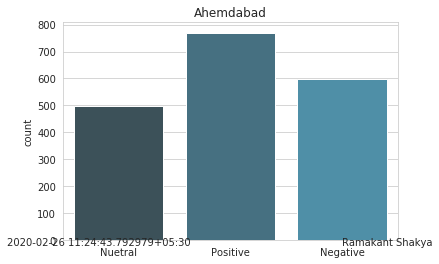

In [0]:
sns.countplot(ahem_senti)
plt.title('Ahemdabad')
plt.text(2,-20,'Ramakant Shakya')
plt.text(-1,-20,str(datetime.now(tz_India)))

Text(0, -25, '2020-02-26 11:24:49.645292+05:30')

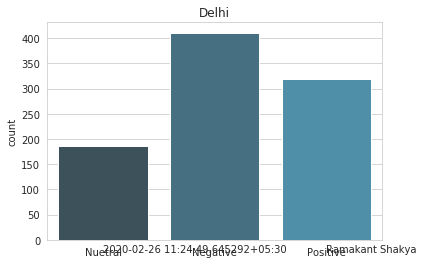

In [0]:
sns.countplot(delhi_senti)
plt.title('Delhi')
plt.text(2,-25,'Ramakant Shakya')
plt.text(0,-25,str(datetime.now(tz_India)))

Text(0, -20, '2020-02-26 11:24:55.238662+05:30')

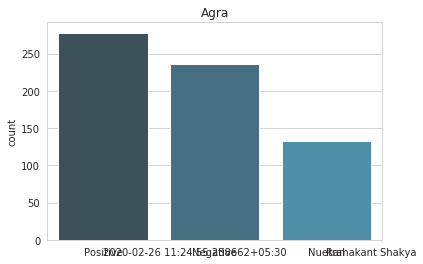

In [0]:
sns.countplot(agra_senti)
plt.title("Agra")
plt.text(2,-20,'Ramakant Shakya')
plt.text(0,-20,str(datetime.now(tz_India)))

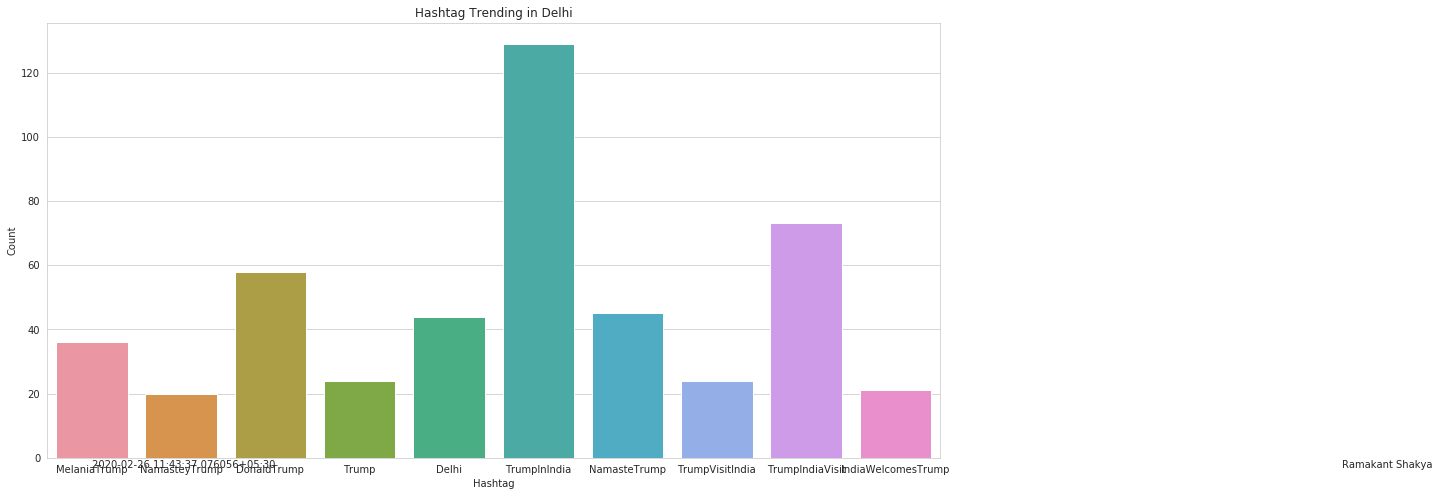

In [0]:
hashtag_count(delhi_tweets_copy,'Text','Delhi',18)

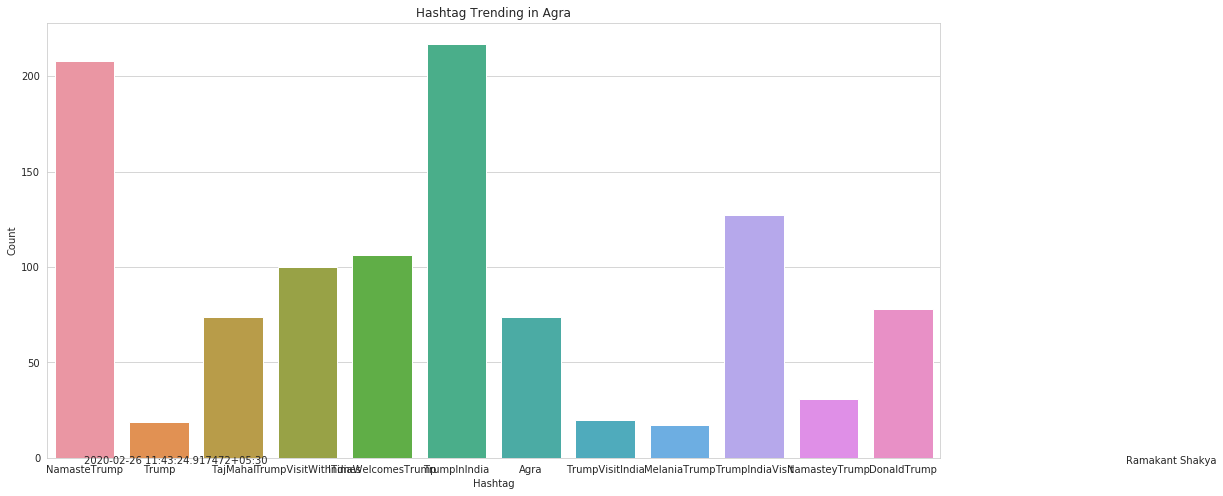

In [0]:
hashtag_count(agra_tweets_copy,'Text','Agra',15)

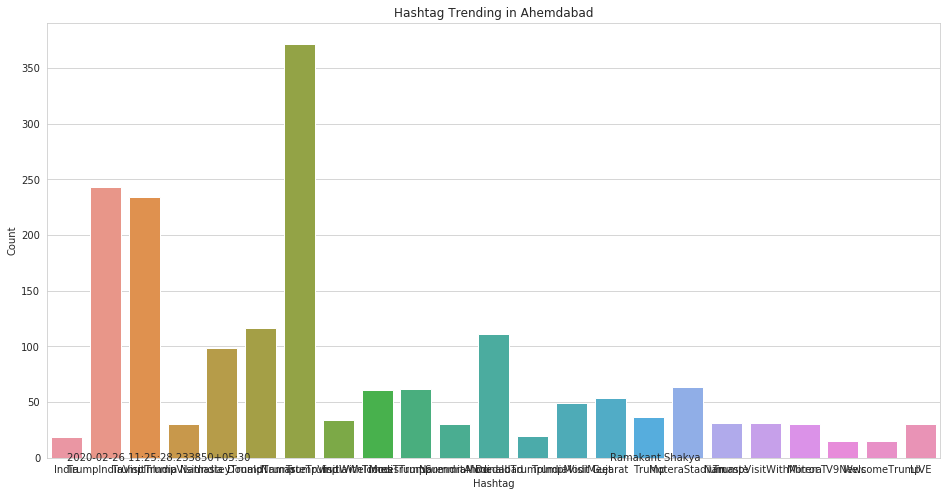

In [0]:
hashtag_count(ahem_tweets_copy,'Text','Ahemdabad',15)

Text(0, -3, '2020-02-26 11:25:38.590779+05:30')

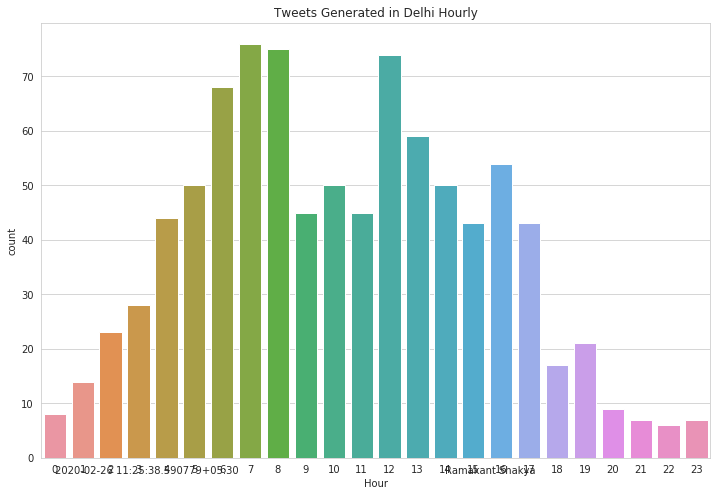

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(delhi_tweets['Hour'])
plt.title('Tweets Generated in Delhi Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -3, '2020-02-26 11:25:43.380419+05:30')

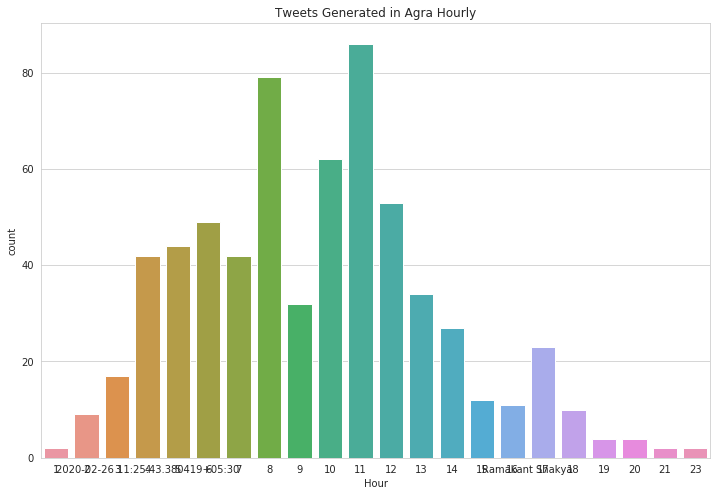

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(agra_tweets['Hour'])
plt.title('Tweets Generated in Agra Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -3, '2020-02-26 11:25:46.982906+05:30')

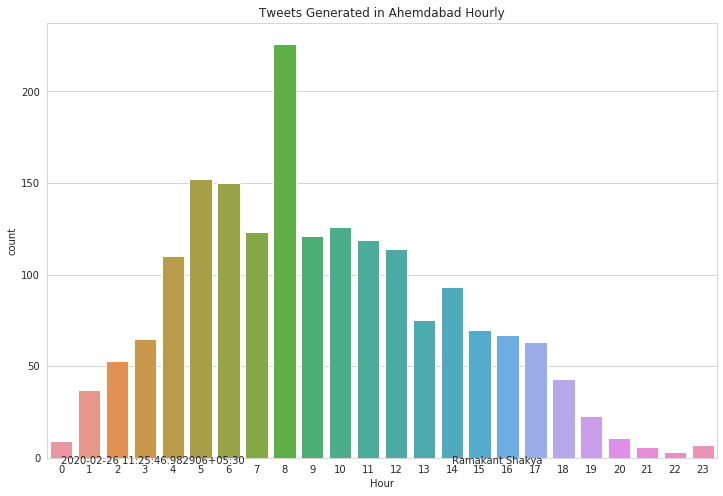

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(ahem_tweets['Hour'])
plt.title('Tweets Generated in Ahemdabad Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -9, '2020-02-26 11:25:50.307225+05:30')

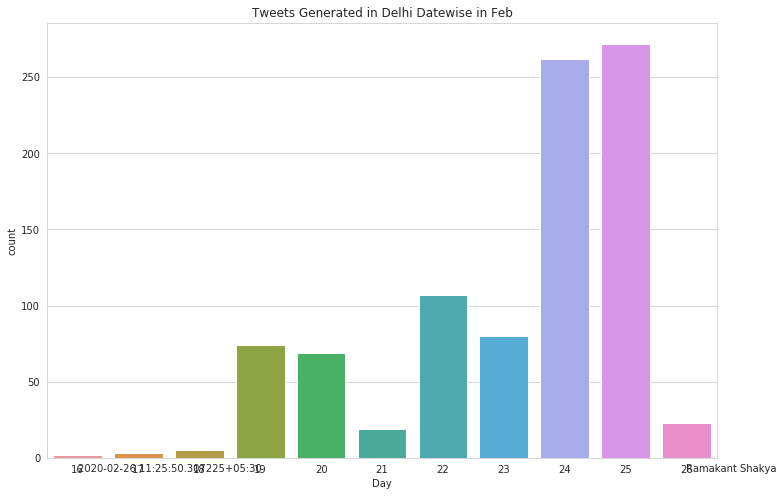

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(delhi_tweets['Day'])
plt.title('Tweets Generated in Delhi Datewise in Feb')
plt.text(10,-9,'Ramakant Shakya')
plt.text(0,-9,str(datetime.now(tz_India)))

Text(0, -9, '2020-02-26 11:25:56.113272+05:30')

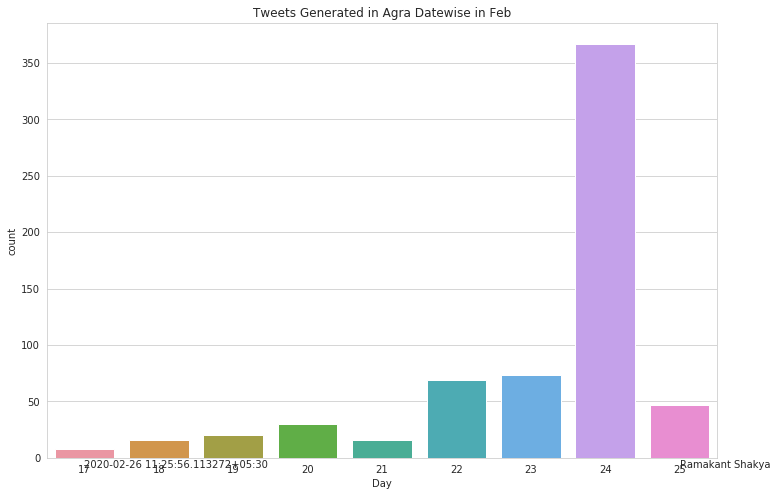

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(agra_tweets['Day'])
plt.title('Tweets Generated in Agra Datewise in Feb')
plt.text(8,-9,'Ramakant Shakya')
plt.text(0,-9,str(datetime.now(tz_India)))

Text(0, -15, '2020-02-26 11:26:34.010905+05:30')

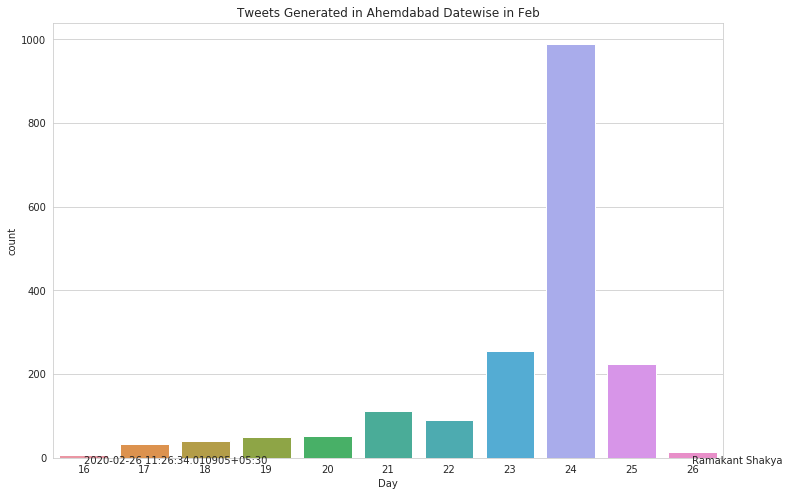

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(ahem_tweets['Day'])
plt.title('Tweets Generated in Ahemdabad Datewise in Feb')
plt.text(10,-15,'Ramakant Shakya')
plt.text(0,-15,str(datetime.now(tz_India)))